In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import scipy.stats as stats
%matplotlib inline

In [201]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

# EDA and cleaning

In [202]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [204]:
# Descriptive stats for numerical columns
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [205]:
# Descriptive stats for categorical columns
df.describe(include='O')

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [206]:
#Let's check each column for the percentage of missing data

missing_data = df.isnull().sum()/df.isnull().count()
missing_data.sort_values(ascending=False).head(20)

poolqc          0.995205
miscfeature     0.963014
alley           0.937671
fence           0.807534
fireplacequ     0.472603
lotfrontage     0.177397
garagecond      0.055479
garagetype      0.055479
garageyrblt     0.055479
garagefinish    0.055479
garagequal      0.055479
bsmtexposure    0.026027
bsmtfintype2    0.026027
bsmtfintype1    0.025342
bsmtcond        0.025342
bsmtqual        0.025342
masvnrarea      0.005479
masvnrtype      0.005479
electrical      0.000685
utilities       0.000000
dtype: float64

19 out of 81 variables contain missing data. Let's see if we will use these variables as features in our model before we decide how to handle the missing values.

In [207]:
#Let's check the correlation of the continuous variables with our target saleprice

df.corr()['saleprice'].sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

- All variables with square footage seem to have a moderate to strong correlation with our target variabele. Let's create another feature which adds up the total square footage.
- All variables with bathrooms seem to have a moderate to strong correlation with our target variabele. Let's create another feature which adds up the total bathrooms.
- I believe the interaction bwtweeen total_sf and overallqual will be a useful feature. Let's create this interaction feature by multiplying total_sf and overallqual

In [208]:
df['total_sf'] = df['grlivarea'] + df['totalbsmtsf'] + df['firstflrsf'] + df['secondflrsf'] + df['wooddecksf'] + df['openporchsf']
df['total_bathrooms'] = df['fullbath'] + .5*df['halfbath'] + df['bsmtfullbath'] + .5*df['bsmthalfbath']
df['int_totalsf_qual'] = df['overallqual']*df['total_sf']
df.corr()['saleprice'].sort_values(ascending=False)

saleprice           1.000000
int_totalsf_qual    0.861880
overallqual         0.790982
total_sf            0.785558
grlivarea           0.708624
garagecars          0.640409
total_bathrooms     0.631731
garagearea          0.623431
totalbsmtsf         0.613581
firstflrsf          0.605852
fullbath            0.560664
totrmsabvgrd        0.533723
yearbuilt           0.522897
yearremodadd        0.507101
garageyrblt         0.486362
masvnrarea          0.477493
fireplaces          0.466929
bsmtfinsf1          0.386420
lotfrontage         0.351799
wooddecksf          0.324413
secondflrsf         0.319334
openporchsf         0.315856
halfbath            0.284108
lotarea             0.263843
bsmtfullbath        0.227122
bsmtunfsf           0.214479
bedroomabvgr        0.168213
screenporch         0.111447
poolarea            0.092404
mosold              0.046432
threessnporch       0.044584
bsmtfinsf2         -0.011378
bsmthalfbath       -0.016844
miscval            -0.021190
id            

All the features that seem to have a strong to moderate correlation with saleprice are
[int_totalsf_qual, overallqual,
total_sf,
grlivarea,
garagecars,
total_bathrooms,
garagearea,
totalbsmtsf,
firstflrsf,
fullbath,
totrmsabvgrd,
yearbuilt,
yearremodadd].<br>
##### Let's see if these features are correlated with each other before adding them to our model.

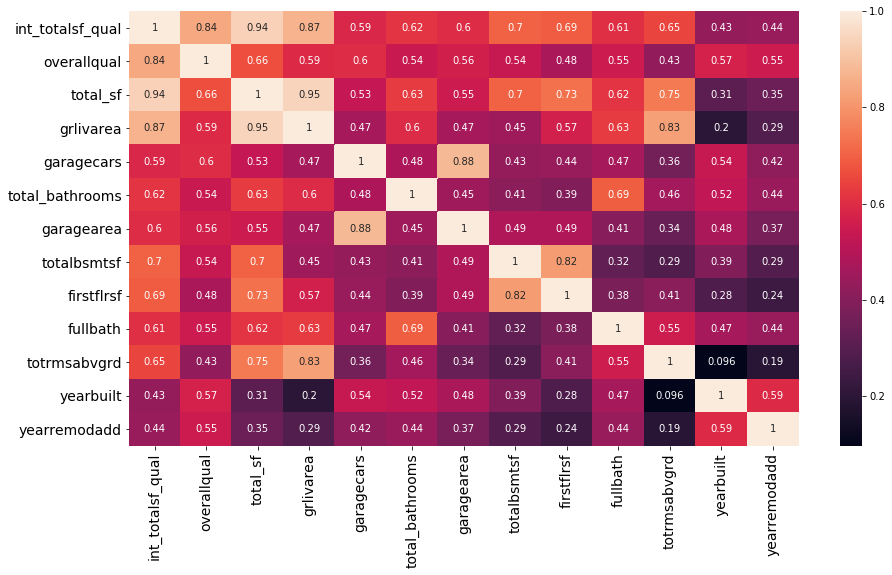

In [209]:
features = df[['int_totalsf_qual', 'overallqual', 'total_sf', 'grlivarea', 'garagecars', 'total_bathrooms',
               'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']]

plt.figure(figsize=(15,8))
sns.heatmap(features.corr(), annot=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(len(features.corr()),0)

plt.show()

- total_sf is strongly correlated with [grlivarea, totalbsmtsf, firstflrsf, totrmsabvgrd]. I will drop these variables, and keep total_sf since it has the strongest correlation with our target variable.
- int_totalsf_qual is strongly correlated with overallqual and total_sf. I will drop these variables, and keep int_totalsf_qual since it has the strongest correlation with our target variable.
- garagecars is strongly correlated with garagearea. I will drop garagearea, and keep garagecars since it has the strongest correlation with our target variable.
- total_bathrooms is strongly correlated with fullbath. I will drop fullbath, and keep total_bathrooms since it has the strongest correlation with our target variable.

#### So now the possible continuous features for our model include
1. int_totalsf_qual
2. garagecars
3. total_bathrooms
4. yearbuilt
5. yearremodadd

Let's look at the feature and target distributions before adding them to our model.

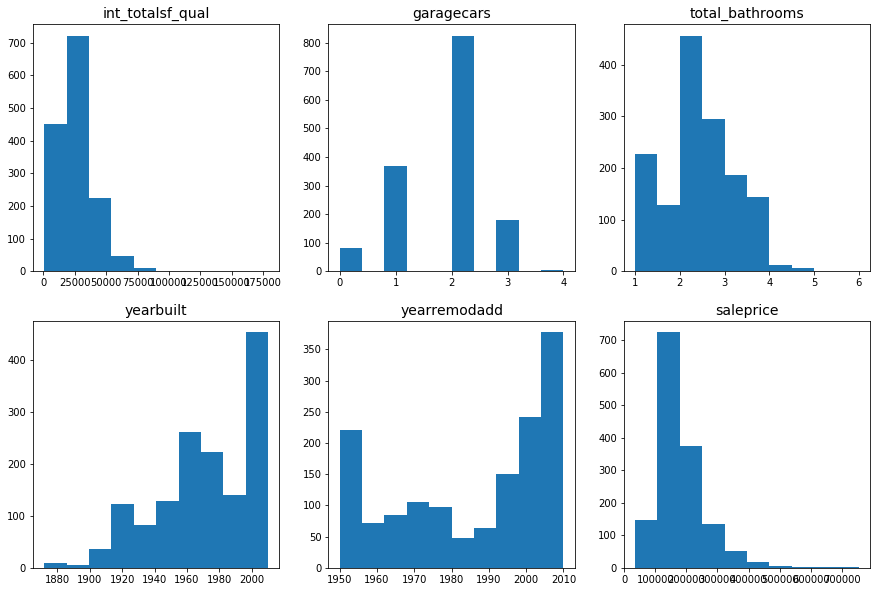

In [231]:
continuous_features = ['int_totalsf_qual', 'garagecars', 'total_bathrooms', 'yearbuilt', 'yearremodadd']

plt.figure(figsize=(15,10))

i = 1
for col in continuous_features:
    plt.subplot(2,3,i)
    plt.hist(df[col])
    plt.title(col, fontsize=14)
    i+=1

plt.subplot(2,3,6)
plt.hist(df['saleprice'])
plt.title('saleprice', fontsize=14)
plt.show()

All of the variables appear to have a non-normal distribution. Let's see if any variables can be transformed to a more normal distribution.

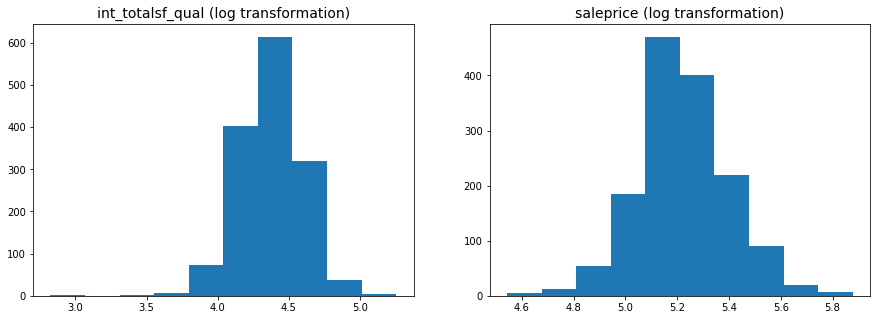

In [211]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(np.log10(df['int_totalsf_qual']))
plt.title('int_totalsf_qual (log transformation)', fontsize=14)

plt.subplot(1,2,2)
plt.hist(np.log10(df['saleprice']))
plt.title('saleprice (log transformation)', fontsize=14)

plt.show()

- int_totalsf_qual and saleprice appear to have much more normal distributions after a log transformation. It did not make sense or it was not possible to transform any of the other variables.
- I will replace int_totalsf_qual and saleprice with their log transformations as features in our final model.

In [212]:
df['log_saleprice'] = np.log10(df['saleprice'])
df['log_int_totalsf_qual'] = np.log10(df['int_totalsf_qual'])

continuous_features = df[['log_int_totalsf_qual', 'garagecars', 'total_bathrooms', 'yearbuilt', 'yearremodadd']]
target = df['log_saleprice']

#### Now let's look at our categorical features.

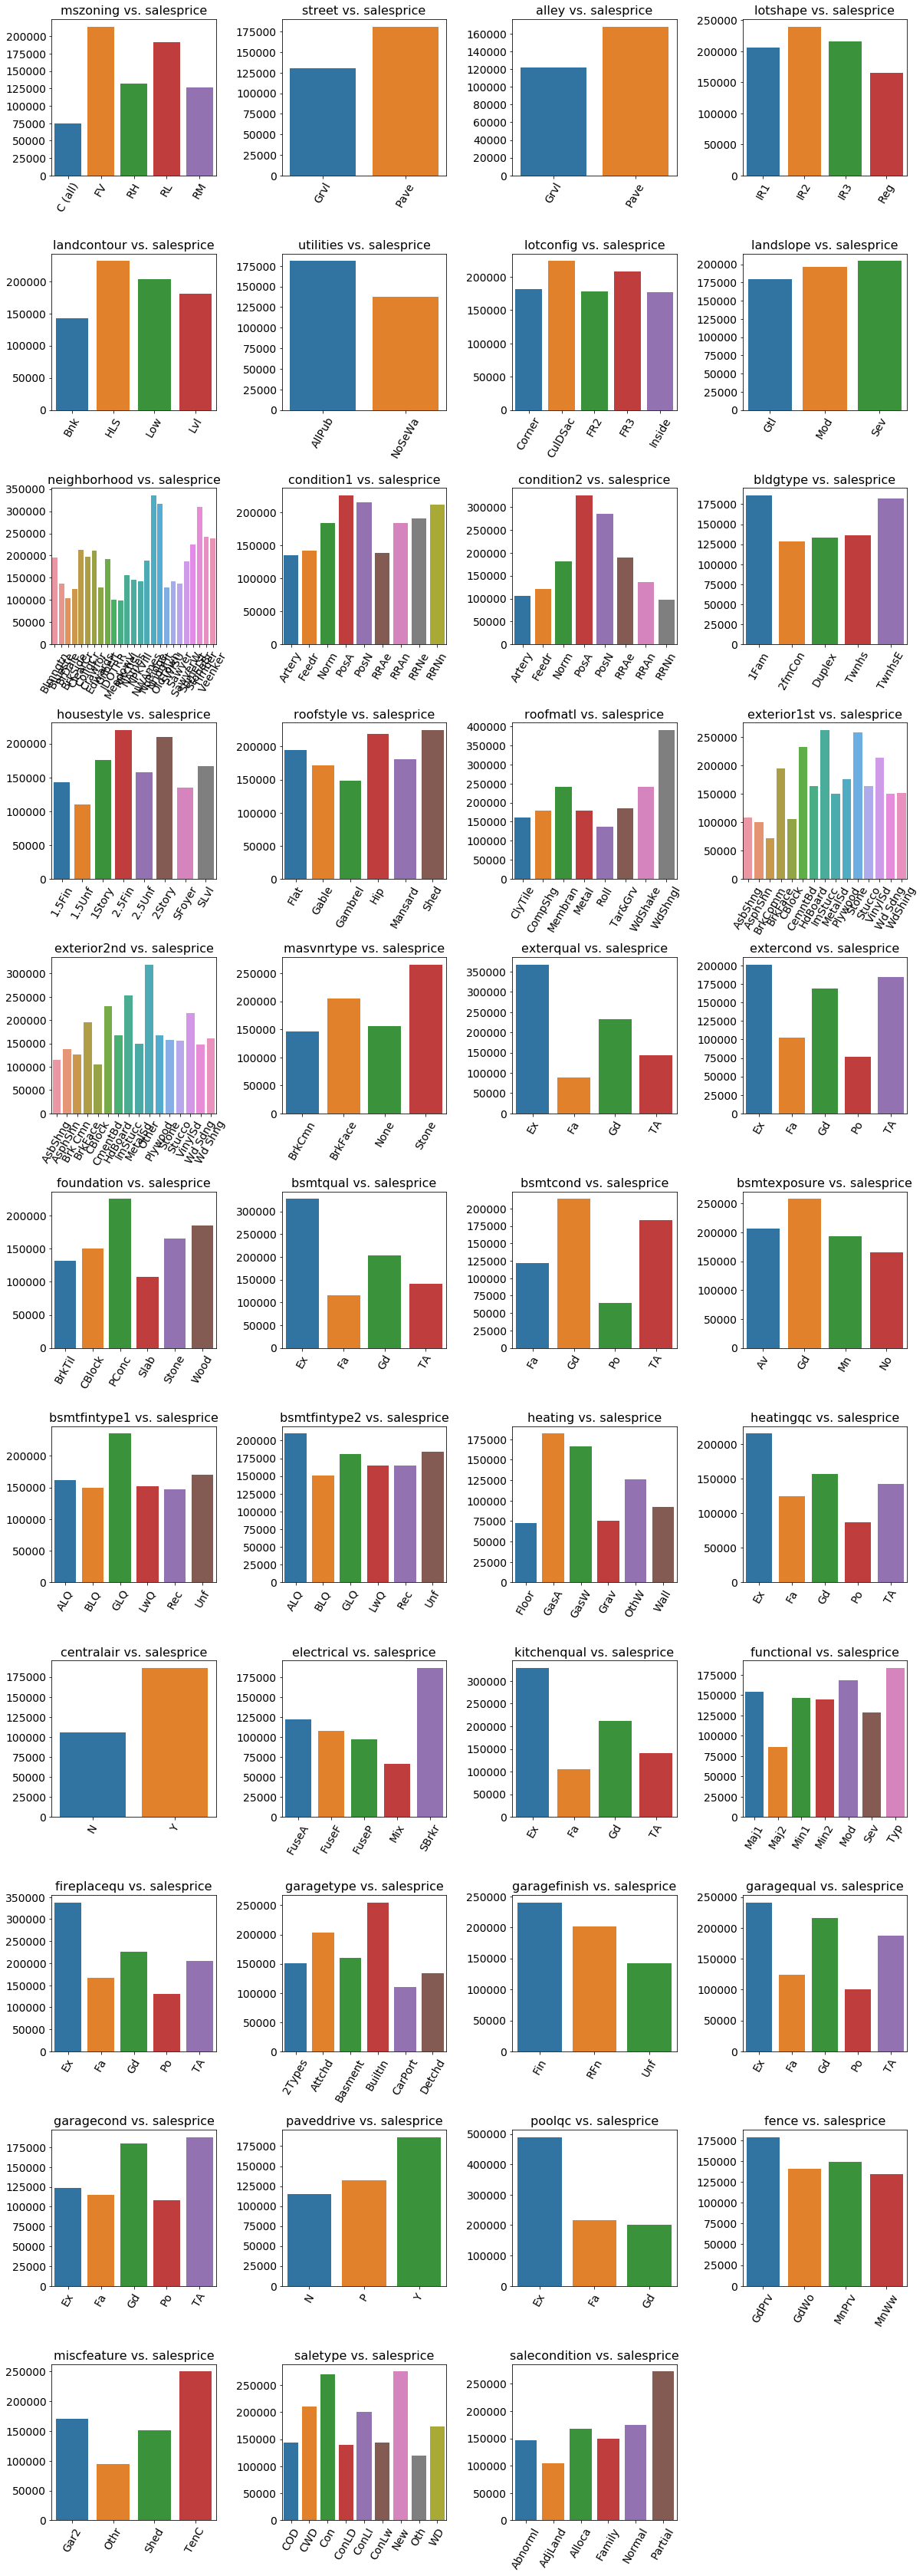

In [213]:
categorical_columns = list(df.describe(include='O').columns)

plt.figure(figsize=(20,60))
plt.subplots_adjust(hspace=.5, wspace=.4)

# Let's visualize all categories vs. saleprice
i = 1
for col in categorical_columns:
    x = df.groupby(col).mean().index
    y = df.groupby(col).mean()['saleprice']
    plt.subplot(11, 4, i)
    sns.barplot(x=x, y=y)
    plt.title('{} vs. salesprice'.format(col), fontsize=16)
    plt.xticks(rotation=60, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    i += 1
plt.show()

Looking at our graphs, there seems to be a large variance in neighborhoods, kitchen quality, and external quality with respect to the average selling price. This leads me to beleive that these variables have a strong correlation with the target variable. First let's confirm the correlation of all these variables with the target by finding cramers value.

In [214]:
from scipy.stats import chi2_contingency

# first I made a function to find cramers value for two categorical variables
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return (chi2/(n*min((k-1),(r-1))))**.5

In [215]:
# I transformed sale price into a categorical variable
df['saleprice_category'] = pd.cut(df['saleprice'], 5)

In [216]:
# Create a list of all the other categorical variables
# Compare all these variables with saleprice
cat_cols = ['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'fence', 'miscfeature',
       'saletype', 'salecondition']

# Create a dictionary that will show cramers value of saleprice with all the other categoricl variables
category_saleprice_cramerv = {}

for col in cat_cols:
        x = df[col]
        y = df['saleprice_category']
        category_saleprice_cramerv[col+'/saleprice'] = cramers_v(x,y)
        
category_saleprice_cramerv = sorted(category_saleprice_cramerv.items(), key = lambda x : x[1])
category_saleprice_cramerv[-10:]

[('exterior2nd/saleprice', 0.2448961318508167),
 ('garagetype/saleprice', 0.24558462939435186),
 ('foundation/saleprice', 0.26783475834637094),
 ('miscfeature/saleprice', 0.27932916306950095),
 ('garagefinish/saleprice', 0.40459427382202684),
 ('alley/saleprice', 0.42303214911752496),
 ('neighborhood/saleprice', 0.42830205969477086),
 ('kitchenqual/saleprice', 0.42997279399618005),
 ('bsmtqual/saleprice', 0.4300387683922027),
 ('exterqual/saleprice', 0.44569856738553454)]

#### The categorical features most associated with the saleprice category are
    1. exterqual
    2. bsmtqual
    3. kitchenqual
    4. neighborhood
    5. garagefinish
<br>
Before we add these features to our model, let's check if they are correlated with each other.

In [217]:
model_cat = ['exterqual', 'bsmtqual', 'kitchenqual', 'garagefinish', 'neighborhood']

# correlation of categorical features with 'exterqual'
for col in model_cat:
        x = df[col]
        y = df['exterqual']
        print('exterqual and {}: cramerV = {}'.format(col, cramers_v(x,y)))
print('\n')

# correlation of categorical features with 'bsmtqual'
for col in model_cat:
        x = df[col]
        y = df['bsmtqual']
        print('bsmtqual and {}: cramerV = {}'.format(col, cramers_v(x,y)))
print('\n')

# correlation of categorical features with 'kitchenqual'
for col in model_cat:
        x = df[col]
        y = df['kitchenqual']
        print('kitchenqual and {}: cramerV = {}'.format(col, cramers_v(x,y)))
print('\n')

# correlation of categorical features with 'garagefinish'
for col in model_cat:
        x = df[col]
        y = df['garagefinish']
        print('garagefinish and {}: cramerV = {}'.format(col, cramers_v(x,y)))
print('\n')

# correlation of categorical features with 'neighborhood'
for col in model_cat:
        x = df[col]
        y = df['neighborhood']
        print('neighborhood and {}: cramerV = {}'.format(col, cramers_v(x,y)))

exterqual and exterqual: cramerV = 1.0
exterqual and bsmtqual: cramerV = 0.46335772584106916
exterqual and kitchenqual: cramerV = 0.5473579787253363
exterqual and garagefinish: cramerV = 0.3844751681846295
exterqual and neighborhood: cramerV = 0.5014215819300107


bsmtqual and exterqual: cramerV = 0.46335772584106916
bsmtqual and bsmtqual: cramerV = 1.0
bsmtqual and kitchenqual: cramerV = 0.42144319324182283
bsmtqual and garagefinish: cramerV = 0.41235902117554984
bsmtqual and neighborhood: cramerV = 0.5498634960456551


kitchenqual and exterqual: cramerV = 0.5473579787253363
kitchenqual and bsmtqual: cramerV = 0.42144319324182283
kitchenqual and kitchenqual: cramerV = 1.0
kitchenqual and garagefinish: cramerV = 0.3516620234001271
kitchenqual and neighborhood: cramerV = 0.46202181655528285


garagefinish and exterqual: cramerV = 0.3844751681846295
garagefinish and bsmtqual: cramerV = 0.41235902117554984
garagefinish and kitchenqual: cramerV = 0.3516620234001271
garagefinish and garagef

##### All of the categorical features are moderately associated with each other and will be used in our model.
##### Now let's add all our features to the model

In [218]:
categorical_features = pd.get_dummies(df[['exterqual', 'bsmtqual', 'kitchenqual', 'garagefinish', 'neighborhood']], drop_first=True)

model_features = pd.concat([continuous_features, categorical_features], axis=1)

In [219]:
# X is all the features for our model
X = model_features

# target is saleprice
Y = target

In [220]:
from sklearn.model_selection import train_test_split

# Let's split the data into a training group and tset group
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=200)

# OLS model

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

lrm = LinearRegression()

lrm.fit(X_train, Y_train)

y_preds = lrm.predict(X_test)

print('R-squared for training set: {}'.format(lrm.score(X_train, Y_train)))
print('--------------------------')
print('R-squared for test set: {}'.format(lrm.score(X_test, Y_test)))
print('mean absolute error for test set: {}'.format(mean_absolute_error(y_preds, Y_test)))
print('mean squared error for test set: {}'.format(mse(y_preds, Y_test)))
print('root mean squared error for test set: {}'.format(rmse(y_preds, Y_test)))
print('mean absolute percentage error for test set: {}'.format(np.mean(np.abs(y_preds-Y_test)/Y_test)*100))

R-squared for training set: 0.8781564824632325
--------------------------
R-squared for test set: 0.8611604037591601
mean absolute error for test set: 0.0454075206092834
mean squared error for test set: 0.004216450405464482
root mean squared error for test set: 0.0649342005838563
mean absolute percentage error for test set: 0.8706591172689219


# Lasso Regression model

In [222]:
from sklearn.linear_model import LassoCV

alphas = [10**x for x in range(-10, 40)]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, Y_train)

y_preds = lasso_cv.predict(X_test)

print('Best alpha value: {}'.format(lasso_cv.alpha_))
print('R-squared for training set: {}'.format(lasso_cv.score(X_train, Y_train)))
print('--------------------------')
print('R-squared for test set: {}'.format(lasso_cv.score(X_test, Y_test)))
print('mean absolute error for test set: {}'.format(mean_absolute_error(y_preds, Y_test)))
print('mean squared error for test set: {}'.format(mse(y_preds, Y_test)))
print('root mean squared error for test set: {}'.format(rmse(y_preds, Y_test)))
print('mean absolute percentage error for test set: {}'.format(np.mean(np.abs(y_preds-Y_test)/Y_test)*100))

Best alpha value: 0.0001
R-squared for training set: 0.8772013333166326
--------------------------
R-squared for test set: 0.8589685168221524
mean absolute error for test set: 0.046012210281569814
mean squared error for test set: 0.004283016304635256
root mean squared error for test set: 0.06544475765586771
mean absolute percentage error for test set: 0.8820229313756488


# Ridge Regression model

In [223]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, Y_train)

y_preds = ridge_cv.predict(X_test)

print('Best alpha value: {}'.format(ridge_cv.alpha_))
print('R-squared for training set: {}'.format(ridge_cv.score(X_train, Y_train)))
print('--------------------------')
print('R-squared for test set: {}'.format(ridge_cv.score(X_test, Y_test)))
print('mean absolute error for test set: {}'.format(mean_absolute_error(y_preds, Y_test)))
print('mean squared error for test set: {}'.format(mse(y_preds, Y_test)))
print('root mean squared error for test set: {}'.format(rmse(y_preds, Y_test)))
print('mean absolute percentage error for test set: {}'.format(np.mean(np.abs(y_preds-Y_test)/Y_test)*100))

Best alpha value: 1
R-squared for training set: 0.877744069991955
--------------------------
R-squared for test set: 0.8614094417470324
mean absolute error for test set: 0.04554137651247183
mean squared error for test set: 0.004208887315730928
root mean squared error for test set: 0.06487593787939352
mean absolute percentage error for test set: 0.8730454050179883


# ElasticNet model

In [224]:
from sklearn.linear_model import ElasticNetCV

elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, Y_train)

y_preds = elasticnet_cv.predict(X_test)

print('Best alpha value: {}'.format(elasticnet_cv.alpha_))
print('R-squared for training set: {}'.format(elasticnet_cv.score(X_train, Y_train)))
print('--------------------------')
print('R-squared for test set: {}'.format(elasticnet_cv.score(X_test, Y_test)))
print('mean absolute error for test set: {}'.format(mean_absolute_error(y_preds, Y_test)))
print('mean squared error for test set: {}'.format(mse(y_preds, Y_test)))
print('root mean squared error for test set: {}'.format(rmse(y_preds, Y_test)))
print('mean absolute percentage error for test set: {}'.format(np.mean(np.abs(y_preds-Y_test)/Y_test)*100))

Best alpha value: 0.0001
R-squared for training set: 0.877759139630887
--------------------------
R-squared for test set: 0.8601866162419585
mean absolute error for test set: 0.04570509519015073
mean squared error for test set: 0.004246023573947475
root mean squared error for test set: 0.0651615191193965
mean absolute percentage error for test set: 0.8762479507091158


#### According to all the metrics, all the models effectively performed the same. I will give the slight edge to the OLS model, and I will use this model moving forward.

# Adding external features
One external feature not included in this data set the health of the stock market/economy. One of the best gauges of measuring the stock market is the S&P 500. The S&p 500 tracks 500 publicly traded, large-cap U.S. companies. I will add a feature which gives the price of the S&P 500 for every month from 2006-2010. Let's see if this feature is correlated with saleprice, and can improve our model

In [225]:
# First let's make a column which combines the month and year the house was sold
df['mo_yr_sold'] = df['mosold'].apply(str) + '-' + df['yrsold'].apply(str)

# Let's create another column which indicates the price of the S&P 500 at the time house was sold
df['S&P_price'] = 0
df.loc[df['mo_yr_sold'] == '1-2006', 'S&P_price'] = 1278.73
df.loc[df['mo_yr_sold'] == '2-2006', 'S&P_price'] = 1276.65
df.loc[df['mo_yr_sold'] == '3-2006', 'S&P_price'] = 1293.74
df.loc[df['mo_yr_sold'] == '4-2006', 'S&P_price'] = 1302.17
df.loc[df['mo_yr_sold'] == '5-2006', 'S&P_price'] = 1290.01
df.loc[df['mo_yr_sold'] == '6-2006', 'S&P_price'] = 1253.17
df.loc[df['mo_yr_sold'] == '7-2006', 'S&P_price'] = 1260.24
df.loc[df['mo_yr_sold'] == '8-2006', 'S&P_price'] = 1287.15
df.loc[df['mo_yr_sold'] == '9-2006', 'S&P_price'] = 1317.74
df.loc[df['mo_yr_sold'] == '10-2006', 'S&P_price'] = 1363.38
df.loc[df['mo_yr_sold'] == '11-2006', 'S&P_price'] = 1388.64
df.loc[df['mo_yr_sold'] == '12-2006', 'S&P_price'] = 1416.42
df.loc[df['mo_yr_sold'] == '1-2007', 'S&P_price'] = 1424.16
df.loc[df['mo_yr_sold'] == '2-2007', 'S&P_price'] = 1444.80
df.loc[df['mo_yr_sold'] == '3-2007', 'S&P_price'] = 1406.95
df.loc[df['mo_yr_sold'] == '4-2007', 'S&P_price'] = 1463.64
df.loc[df['mo_yr_sold'] == '5-2007', 'S&P_price'] = 1511.14
df.loc[df['mo_yr_sold'] == '6-2007', 'S&P_price'] = 1514.19
df.loc[df['mo_yr_sold'] == '7-2007', 'S&P_price'] = 1520.71
df.loc[df['mo_yr_sold'] == '8-2007', 'S&P_price'] = 1454.62
df.loc[df['mo_yr_sold'] == '9-2007', 'S&P_price'] = 1497.12
df.loc[df['mo_yr_sold'] == '10-2007', 'S&P_price'] = 1539.66
df.loc[df['mo_yr_sold'] == '11-2007', 'S&P_price'] = 1463.39
df.loc[df['mo_yr_sold'] == '12-2007', 'S&P_price'] = 1479.22
df.loc[df['mo_yr_sold'] == '1-2008', 'S&P_price'] = 1378.76
df.loc[df['mo_yr_sold'] == '2-2008', 'S&P_price'] = 1354.87
df.loc[df['mo_yr_sold'] == '3-2008', 'S&P_price'] = 1316.94
df.loc[df['mo_yr_sold'] == '4-2008', 'S&P_price'] = 1370.47
df.loc[df['mo_yr_sold'] == '5-2008', 'S&P_price'] = 1403.22
df.loc[df['mo_yr_sold'] == '6-2008', 'S&P_price'] = 1341.25
df.loc[df['mo_yr_sold'] == '7-2008', 'S&P_price'] = 1257.33
df.loc[df['mo_yr_sold'] == '8-2008', 'S&P_price'] = 1281.47
df.loc[df['mo_yr_sold'] == '9-2008', 'S&P_price'] = 1216.95
df.loc[df['mo_yr_sold'] == '10-2008', 'S&P_price'] = 968.80
df.loc[df['mo_yr_sold'] == '11-2008', 'S&P_price'] = 883.04
df.loc[df['mo_yr_sold'] == '12-2008', 'S&P_price'] = 877.56
df.loc[df['mo_yr_sold'] == '1-2009', 'S&P_price'] = 865.58
df.loc[df['mo_yr_sold'] == '2-2009', 'S&P_price'] = 805.23
df.loc[df['mo_yr_sold'] == '3-2009', 'S&P_price'] = 757.13
df.loc[df['mo_yr_sold'] == '4-2009', 'S&P_price'] = 848.15
df.loc[df['mo_yr_sold'] == '5-2009', 'S&P_price'] = 902.41
df.loc[df['mo_yr_sold'] == '6-2009', 'S&P_price'] = 926.12
df.loc[df['mo_yr_sold'] == '7-2009', 'S&P_price'] = 935.82
df.loc[df['mo_yr_sold'] == '8-2009', 'S&P_price'] = 1009.73
df.loc[df['mo_yr_sold'] == '9-2009', 'S&P_price'] = 1044.55
df.loc[df['mo_yr_sold'] == '10-2009', 'S&P_price'] = 1067.66
df.loc[df['mo_yr_sold'] == '11-2009', 'S&P_price'] = 1088.07
df.loc[df['mo_yr_sold'] == '12-2009', 'S&P_price'] = 1110.38
df.loc[df['mo_yr_sold'] == '1-2010', 'S&P_price'] = 1123.58
df.loc[df['mo_yr_sold'] == '2-2010', 'S&P_price'] = 1089.16
df.loc[df['mo_yr_sold'] == '3-2010', 'S&P_price'] = 1152.05
df.loc[df['mo_yr_sold'] == '4-2010', 'S&P_price'] = 1197.32
df.loc[df['mo_yr_sold'] == '5-2010', 'S&P_price'] = 1125.06
df.loc[df['mo_yr_sold'] == '6-2010', 'S&P_price'] = 1083.36
df.loc[df['mo_yr_sold'] == '7-2010', 'S&P_price'] = 1079.80
df.loc[df['mo_yr_sold'] == '8-2010', 'S&P_price'] = 1087.28
df.loc[df['mo_yr_sold'] == '9-2010', 'S&P_price'] = 1122.08
df.loc[df['mo_yr_sold'] == '10-2010', 'S&P_price'] = 1171.58
df.loc[df['mo_yr_sold'] == '11-2010', 'S&P_price'] = 1998.71
df.loc[df['mo_yr_sold'] == '12-2010', 'S&P_price'] = 1241.53

In [226]:
# Let's see if adding the S&P feature improves our model

model_features = pd.concat([continuous_features, categorical_features, df['S&P_price']], axis=1)

In [227]:
# X is all the features for our model
X = model_features

# target is saleprice
Y = target

In [228]:
from sklearn.model_selection import train_test_split

# Let's split the data into a training group and tset group
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=200)

In [229]:
lrm = LinearRegression()

lrm.fit(X_train, Y_train)

y_preds = lrm.predict(X_test)

print('R-squared for training set: {}'.format(lrm.score(X_train, Y_train)))
print('--------------------------')
print('R-squared for test set: {}'.format(lrm.score(X_test, Y_test)))
print('mean absolute error for test set: {}'.format(mean_absolute_error(y_preds, Y_test)))
print('mean squared error for test set: {}'.format(mse(y_preds, Y_test)))
print('root mean squared error for test set: {}'.format(rmse(y_preds, Y_test)))
print('mean absolute percentage error for test set: {}'.format(np.mean(np.abs(y_preds-Y_test)/Y_test)*100))

R-squared for training set: 0.878763243979555
--------------------------
R-squared for test set: 0.8618800017130429
mean absolute error for test set: 0.04535324942332451
mean squared error for test set: 0.004194596776049158
root mean squared error for test set: 0.0647657067903158
mean absolute percentage error for test set: 0.869558051500857


#### It seems that adding the S&P feature to our model provided minimal to no improvement, at the expense of increasing the dimensionality. I would not recommend adding this feature. Also we do not know if the stock market affected Ames, Iowa the same way it affected the rest of the country.